In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from fastplotlib.graphics import ImageGraphic, LineCollection
from fastplotlib.plot import Plot
import pickle

In [3]:
contours = pickle.load(open("/home/caitlin/Downloads/contours.pickle", "rb"))

In [4]:
line_collection = LineCollection(data=contours, cmap="jet")

In [5]:
plot = Plot()

RFBOutputContext()

MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0



In [6]:
data = np.ones(shape=(175, 175))

In [7]:
img = ImageGraphic(data=data)

In [8]:
for contour in line_collection:
    plot.add_graphic(contour)

In [9]:
plot.add_graphic(img)


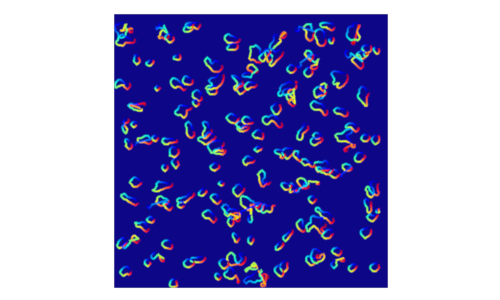

JupyterWgpuCanvas()

In [10]:
plot.show()

In [11]:
white = list()
for contour in line_collection:
    white.append(np.ones(shape=contour.colors.shape))

In [12]:
from typing import *

In [13]:
def indices_mapper(target: Any, indices: np.array) -> int:
    # calculate coms of line collection 
    
    coms = list()

    for contour in target.data:
        coors = contour.data[~np.isnan(contour.data).any(axis=1)]
        com = coors.mean(axis=0)
        coms.append(com)

    # euclidean distance to find closest index of com 
    indices = np.append(indices, [0])
    
    ix = np.linalg.norm((coms - indices), axis=1).argsort()[0] 
    
    #return that index to set feature 
    return ix

In [14]:
img.link(event_type="click", target=line_collection, feature="colors", new_data=white, indices_mapper=indices_mapper)